<a href="https://colab.research.google.com/github/Lianasy/Decision-Theory-Labs/blob/main/TPR_lab1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [ ]:
# Початкові дані
data = [
    ['27', '50', '36', '60', '18', '05', '63', '49', '44', '11', '05', '34', '91', '75', '55', '14', '89', '68', '93', '18'],
    ['05', '82', '22', '82', '17', '30', '93', '74', '26', '93', '86', '53', '43', '74', '14', '13', '79', '77', '62', '75'],
    ['88', '19', '10', '32', '94', '17', '46', '35', '37', '91', '53', '43', '73', '28', '25', '91', '10', '18', '17', '36']
]

# Об'єднуємо всі дані
all_data = data[0] + data[1] + data[2]

In [ ]:

# Функція для розбиття числа на Q1 і Q2
def split_into_q1_q2(values):
    q1_q2 = [(int(val[0]), int(val[1])) for val in values]  # Беремо першу і другу цифру рядка
    return np.array(q1_q2)

# Створюємо три окремі датафрейми для кожного рядка
df1 = pd.DataFrame(split_into_q1_q2(data[0]).T, columns=[f"A{i+1}" for i in range(len(data[0]))], index=["Q1", "Q2"])
df2 = pd.DataFrame(split_into_q1_q2(data[1]).T, columns=[f"A{i+1}" for i in range(len(data[1]))], index=["Q1", "Q2"])
df3 = pd.DataFrame(split_into_q1_q2(data[2]).T, columns=[f"A{i+1}" for i in range(len(data[2]))], index=["Q1", "Q2"])

# Створюємо загальний DataFrame для всіх трьох рядків
df_all = pd.DataFrame(split_into_q1_q2(all_data).T, columns=[f"A{i+1}" for i in range(len(all_data))], index=["Q1", "Q2"])

# Виводимо результат
print("Таблиця для першого рядка:")
print(df1)
print("\nТаблиця для другого рядка:")
print(df2)
print("\nТаблиця для третього рядка:")
print(df3)
print("\nТаблиця, яка містить усі три рядки:")
print(df_all)

Таблиця для першого рядка:
    A1  A2  A3  A4  A5  A6  A7  A8  A9  A10  A11  A12  A13  A14  A15  A16  \
Q1   2   5   3   6   1   0   6   4   4    1    0    3    9    7    5    1   
Q2   7   0   6   0   8   5   3   9   4    1    5    4    1    5    5    4   

    A17  A18  A19  A20  
Q1    8    6    9    1  
Q2    9    8    3    8  

Таблиця для другого рядка:
    A1  A2  A3  A4  A5  A6  A7  A8  A9  A10  A11  A12  A13  A14  A15  A16  \
Q1   0   8   2   8   1   3   9   7   2    9    8    5    4    7    1    1   
Q2   5   2   2   2   7   0   3   4   6    3    6    3    3    4    4    3   

    A17  A18  A19  A20  
Q1    7    7    6    7  
Q2    9    7    2    5  

Таблиця для третього рядка:
    A1  A2  A3  A4  A5  A6  A7  A8  A9  A10  A11  A12  A13  A14  A15  A16  \
Q1   8   1   1   3   9   1   4   3   3    9    5    4    7    2    2    9   
Q2   8   9   0   2   4   7   6   5   7    1    3    3    3    8    5    1   

    A17  A18  A19  A20  
Q1    1    1    1    3  
Q2    0    8    7   

In [ ]:
# Функція для знаходження альтернативи, яка домінує за Парето
def find_pareto_dominance(df):
    points = df.T.values
    dominance_row = []
    for i, point in enumerate(points):
        dominated_by = ""
        for j, other_point in enumerate(points):
            if np.all(other_point >= point) and np.any(other_point > point):
                dominated_by = df.columns[j]
                break
        dominance_row.append(dominated_by)
    return dominance_row

# Додаємо рядок з інформацією про те, хто домінує
def add_pareto_dominance(df):
    dominance_row = find_pareto_dominance(df)
    df.loc["Домінується за Парето"] = dominance_row
    return df

# Додаємо інформацію про Парето-домінування до кожного датафрейму
df1 = add_pareto_dominance(df1)
df2 = add_pareto_dominance(df2)
df3 = add_pareto_dominance(df3)
df_all = add_pareto_dominance(df_all)

In [ ]:
# Функція для знаходження альтернативи, яка домінує за Слейтером, тільки на основі Q1 і Q2
def find_slayter_dominance(df):
    points = df.loc[["Q1", "Q2"]].T.values
    dominance_row = []

    for i, point in enumerate(points):
        strictly_dominated_by = ""
        # Ітеруємо по всім альтернативам, крім поточної
        for j, other_point in enumerate(points):
            if i != j:
                # Перевіряємо, чи інша альтернатива строго краща по всім критеріям (Q1 і Q2)
                if np.all(other_point > point):
                    strictly_dominated_by = df.columns[j]  # Записуємо альтернативу, яка домінує
                    break  # Якщо знайшли домінуючу альтернативу, зупиняємо перевірку
        dominance_row.append(strictly_dominated_by)

    return dominance_row

# Додаємо рядок з інформацією про те, хто домінує за Слейтером
def add_slayter_dominance(df):
    dominance_row = find_slayter_dominance(df)
    df.loc["Домінується за Слейтером"] = dominance_row
    return df

# Виконуємо домінування за Слейтером для кожного датафрейму
df1 = add_slayter_dominance(df1)
df2 = add_slayter_dominance(df2)
df3 = add_slayter_dominance(df3)
df_all = add_slayter_dominance(df_all)

# Виводимо результати
print("Таблиця для першого рядка з домінуванням за Слейтером:")
print(df1)
print("\nТаблиця для другого рядка з домінуванням за Слейтером:")
print(df2)
print("\nТаблиця для третього рядка з домінуванням за Слейтером:")
print(df3)
print("\nТаблиця для загального рядка з домінуванням за Слейтером:")
print(df_all)

Таблиця для першого рядка з домінуванням за Слейтером:
                          A1  A2  A3   A4  A5  A6   A7   A8   A9 A10 A11 A12  \
Q1                         2   5   3    6   1   0    6    4    4   1   0   3   
Q2                         7   0   6    0   8   5    3    9    4   1   5   4   
Домінується за Парето     A8  A4  A8   A7  A8  A1  A14  A17   A8  A1  A1  A3   
Домінується за Слейтером  A8  A7  A8  A13  A8  A1  A14       A14  A1  A1  A8   

                          A13  A14  A15 A16 A17  A18 A19 A20  
Q1                          9    7    5   1   8    6   9   1  
Q2                          1    5    5   4   9    8   3   8  
Домінується за Парето     A19  A17  A14  A1      A17      A8  
Домінується за Слейтером       A17  A17  A1      A17      A8  

Таблиця для другого рядка з домінуванням за Слейтером:
                          A1  A2  A3  A4   A5  A6 A7   A8   A9 A10 A11 A12  \
Q1                         0   8   2   8    1   3  9    7    2   9   8   5   
Q2               

In [ ]:
df1

,A1,A2,A3,A4,A5,A6,A7,A8,A9,A10,A11,A12,A13,A14,A15,A16,A17,A18,A19,A20
Q1,2,5,3,6,1,0,6,4,4,1,0,3,9,7,5,1,8,6,9,1
Q2,7,0,6,0,8,5,3,9,4,1,5,4,1,5,5,4,9,8,3,8
Домінується за Парето,A8,A4,A8,A7,A8,A1,A14,A17,A8,A1,A1,A3,A19,A17,A14,A1,,A17,,A8
Домінується за Слейтером,A8,A7,A8,A13,A8,A1,A14,,A14,A1,A1,A8,,A17,A17,A1,,A17,,A8


In [ ]:
df2

,A1,A2,A3,A4,A5,A6,A7,A8,A9,A10,A11,A12,A13,A14,A15,A16,A17,A18,A19,A20
Q1,0,8,2,8,1,3,9,7,2,9,8,5,4,7,1,1,7,7,6,7
Q2,5,2,2,2,7,0,3,4,6,3,6,3,3,4,4,3,9,7,2,5
Домінується за Парето,A5,A7,A2,A7,A17,A2,,A11,A11,,,A7,A7,A11,A5,A5,,A17,A2,A11
Домінується за Слейтером,A5,A7,A7,A7,A17,A2,,A11,A17,,,A8,A8,A11,A9,A8,,,A7,A11


In [ ]:
df3

,A1,A2,A3,A4,A5,A6,A7,A8,A9,A10,A11,A12,A13,A14,A15,A16,A17,A18,A19,A20
Q1,8,1,1,3,9,1,4,3,3,9,5,4,7,2,2,9,1,1,1,3
Q2,8,9,0,2,4,7,6,5,7,1,3,3,3,8,5,1,0,8,7,6
Домінується за Парето,,,A1,A1,,A1,A1,A1,A1,A5,A1,A1,A1,A1,A1,A5,A1,A1,A1,A1
Домінується за Слейтером,,,A1,A1,,A1,A1,A1,A1,,A1,A1,A1,,A1,,A1,,A1,A1


In [ ]:
df_all

,A1,A2,A3,A4,A5,A6,A7,A8,A9,A10,...,A51,A52,A53,A54,A55,A56,A57,A58,A59,A60
Q1,2,5,3,6,1,0,6,4,4,1,...,5,4,7,2,2,9,1,1,1,3
Q2,7,0,6,0,8,5,3,9,4,1,...,3,3,3,8,5,1,0,8,7,6
Домінується за Парето,A8,A4,A8,A7,A8,A1,A14,A17,A8,A1,...,A7,A7,A14,A8,A1,A19,A1,A8,A1,A8
Домінується за Слейтером,A8,A7,A8,A13,A8,A1,A14,,A14,A1,...,A14,A14,A17,A8,A3,,A1,A8,A8,A8


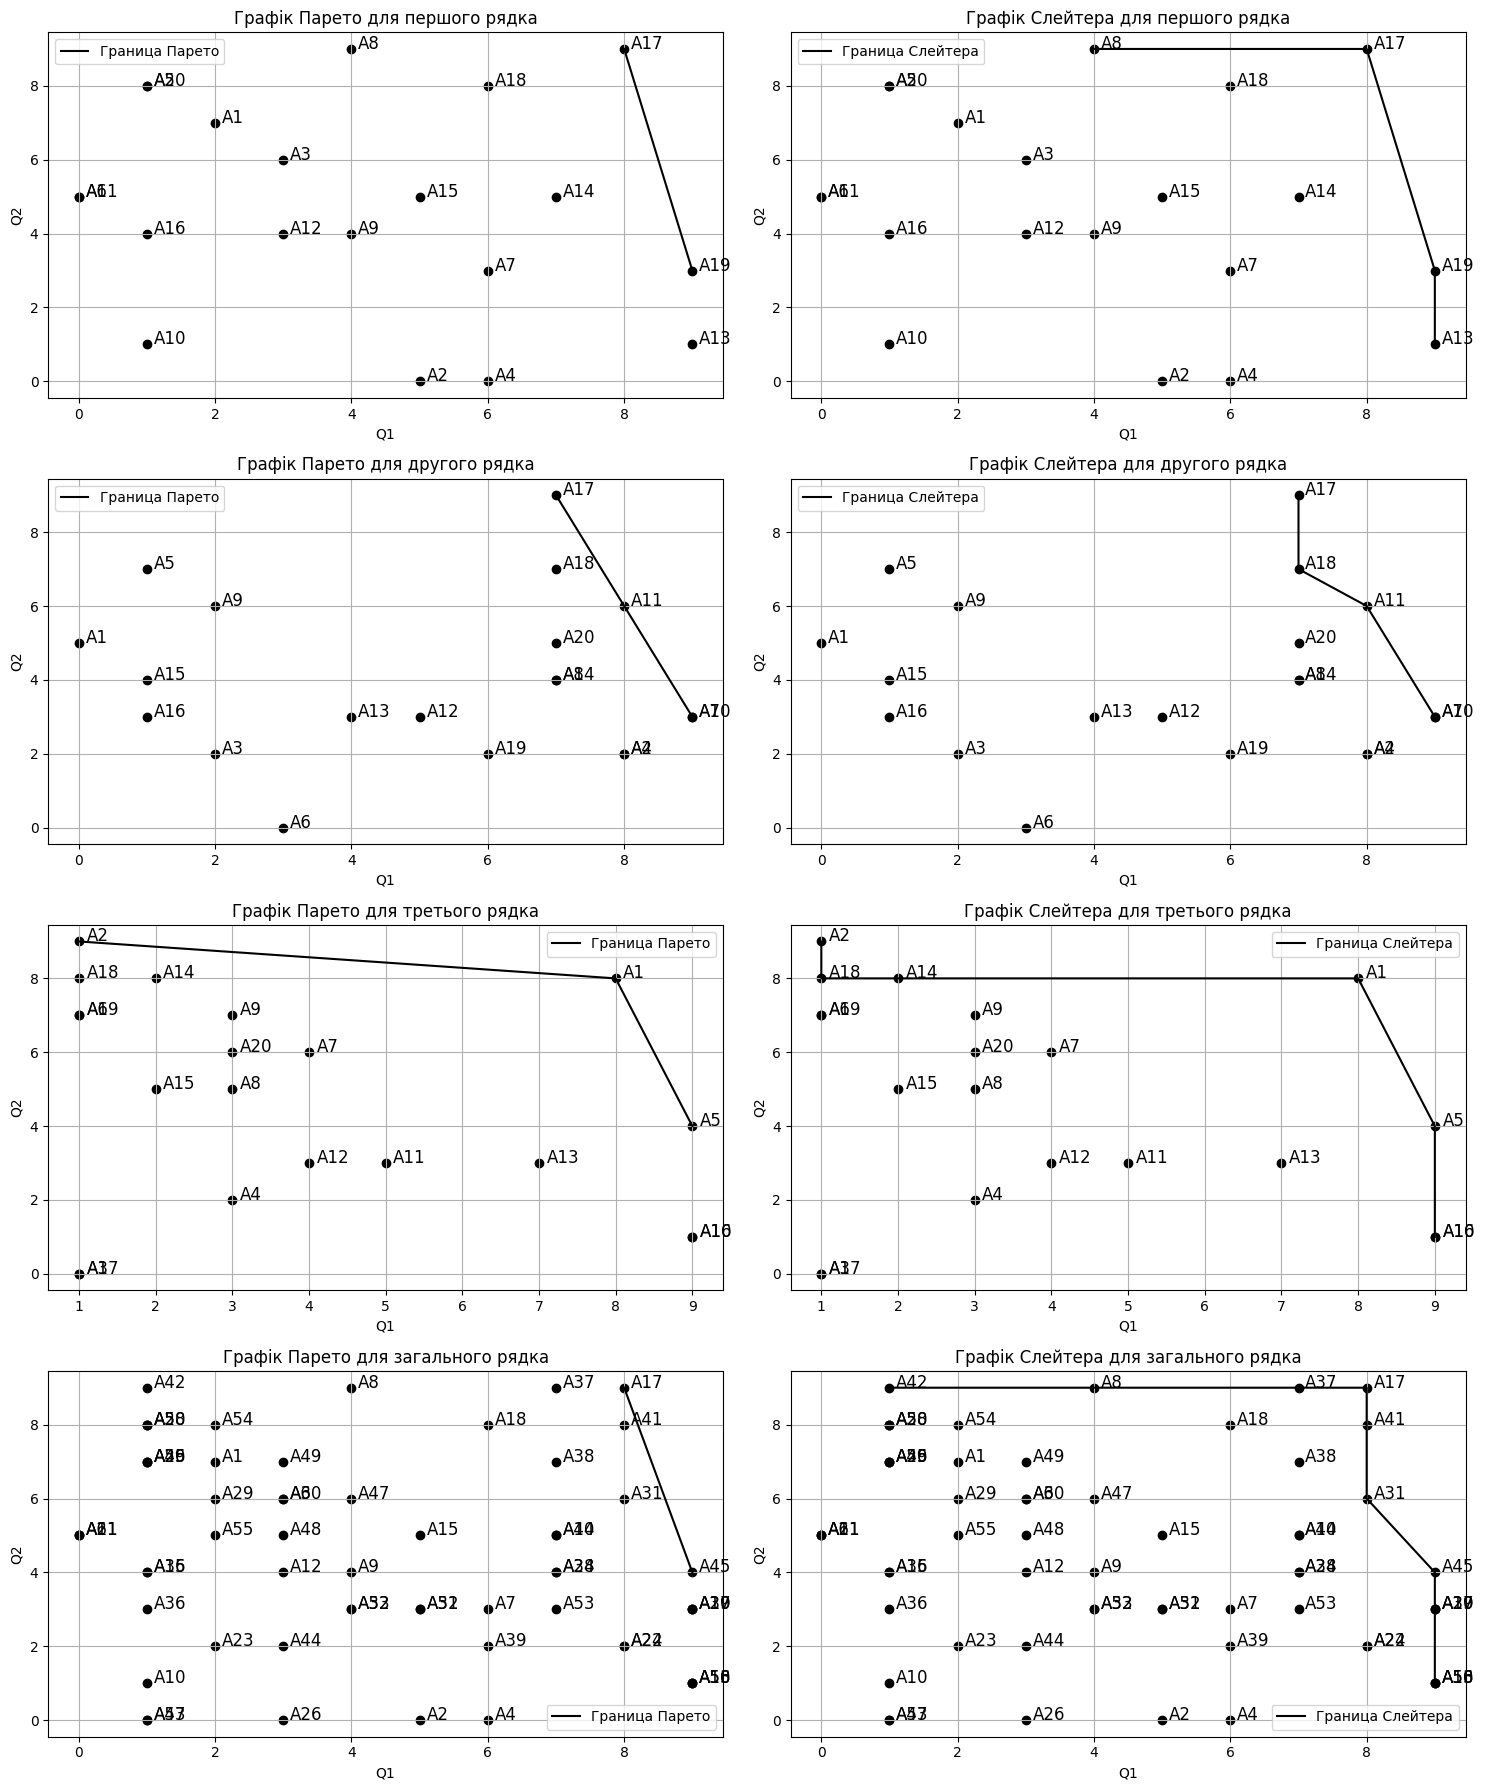

In [ ]:
# Функція для візуалізації Парето-оптимальних альтернатив з підписами та лінією
def plot_pareto_frontier(df, ax, title):
    points = df.loc[["Q1", "Q2"]].T.values

    # Отримуємо список Парето-оптимальних альтернатив
    pareto_optimal = [col for col, val in zip(df.columns, df.loc["Домінується за Парето"]) if not val]

    # Всі альтернативи
    ax.scatter(points[:, 0], points[:, 1], color='black')

    # Підписуємо всі альтернативи
    for i, col in enumerate(df.columns):
        ax.text(points[i, 0] + 0.1, points[i, 1], col, fontsize=12)

    # Знаходимо індекси Парето-оптимальних точок для побудови лінії
    if pareto_optimal:
        pareto_points = points[[df.columns.get_loc(col) for col in pareto_optimal]]

        # Сортуємо Парето-оптимальні точки за Q1 і Q2 для побудови лінії
        pareto_points_sorted = sorted(pareto_points, key=lambda x: (x[0], -x[1]))

        # Перетворюємо сортування назад в масив numpy для побудови графіка
        pareto_points_sorted = np.array(pareto_points_sorted)

        # Будуємо лінію для Парето-оптимальних точок
        ax.plot(pareto_points_sorted[:, 0], pareto_points_sorted[:, 1], color='black', linestyle='-', label="Граница Парето")

    ax.set_title(title)
    ax.set_xlabel('Q1')
    ax.set_ylabel('Q2')
    ax.legend()
    ax.grid(True)

# Функція для візуалізації Слейтер-оптимальних альтернатив з підписами та лінією
def plot_slayter_frontier(df, ax, title):
    points = df.loc[["Q1", "Q2"]].T.values

    # Отримуємо список Слейтер-оптимальних альтернатив
    slayter_optimal = [col for col, val in zip(df.columns, df.loc["Домінується за Слейтером"]) if not val]

    # Всі альтернативи
    ax.scatter(points[:, 0], points[:, 1], color='black')

    # Підписуємо всі альтернативи
    for i, col in enumerate(df.columns):
        ax.text(points[i, 0] + 0.1, points[i, 1], col, fontsize=12)

    # Знаходимо індекси Слейтер-оптимальних точок для побудови лінії
    if slayter_optimal:
        slayter_points = points[[df.columns.get_loc(col) for col in slayter_optimal]]

        # Сортуємо Слейтер-оптимальні точки за Q1 і Q2 для побудови лінії
        slayter_points_sorted = sorted(slayter_points, key=lambda x: (x[0], -x[1]))

        # Перетворюємо сортування назад в масив numpy для побудови графіка
        slayter_points_sorted = np.array(slayter_points_sorted)

        # Будуємо лінію для Слейтер-оптимальних точок
        ax.plot(slayter_points_sorted[:, 0], slayter_points_sorted[:, 1], color='black', linestyle='-', label="Граница Слейтера")

    ax.set_title(title)
    ax.set_xlabel('Q1')
    ax.set_ylabel('Q2')
    ax.legend()
    ax.grid(True)

# Створюємо фігуру для відображення графіків у вигляді таблиці 3x2
fig, axes = plt.subplots(4, 2, figsize=(15, 18))

# Парето-графіки (зліва)
plot_pareto_frontier(df1, axes[0, 0], "Графік Парето для першого рядка")
plot_pareto_frontier(df2, axes[1, 0], "Графік Парето для другого рядка")
plot_pareto_frontier(df3, axes[2, 0], "Графік Парето для третього рядка")
plot_pareto_frontier(df_all, axes[3, 0], "Графік Парето для загального рядка")

# Слейтер-графіки (справа)
plot_slayter_frontier(df1, axes[0, 1], "Графік Слейтера для першого рядка")
plot_slayter_frontier(df2, axes[1, 1], "Графік Слейтера для другого рядка")
plot_slayter_frontier(df3, axes[2, 1], "Графік Слейтера для третього рядка")
plot_slayter_frontier(df_all, axes[3, 1], "Графік Слейтера для загального рядка")

# Відображаємо всі графіки
plt.tight_layout()
plt.show()